In [3]:
%pip install requests


Note: you may need to restart the kernel to use updated packages.


In [7]:
import requests

def ean13_to_cn(ean13):
    """Extrae el CN del EAN13 (asumiendo formato estándar español)."""
    if not ean13.startswith("847"):
        raise ValueError("El EAN13 no parece ser un código español de medicamento.")
    return ean13[6:12]  # Extrae el CN (6 dígitos)

def consultar_cima_por_cn(cn):
    """Consulta la API de CIMA por código nacional."""
    url = f"https://cima.aemps.es/cima/rest/medicamento?cn={cn}"
    response = requests.get(url)

    if response.status_code == 200:
        data = response.json()
        if data:
            return data
        else:
            print("No se encontró medicamento con ese CN.")
            return None
    else:
        print(f"Error en la petición: {response.status_code}")
        return None

# Ejemplo de uso
ean13 = "8470007198819"  # Cambia esto por el que tengas
try:
    cn = ean13_to_cn(ean13)
    medicamento = consultar_cima_por_cn(cn)

    if medicamento:
        print(f"Nombre: {medicamento['nombre']}")
        print(f"Laboratorio: {medicamento['labtitular']}")
        print(f"Comercializado: {'Sí' if medicamento['comerc'] else 'No'}")
        print(f"Requiere receta: {'Sí' if medicamento['receta'] else 'No'}")
        print(f"Principios activos: {medicamento['pactivos']}")
        print(f"URL ficha técnica: https://cima.aemps.es/cima/dochtml/ft/{medicamento['nregistro']}/FichaTecnica.html")
except Exception as e:
    print(f"Error: {e}")


Nombre: PREGABALINA STADA 75 MG CAPSULAS DURAS EFG
Laboratorio: Laboratorio Stada S.L.
Comercializado: Sí
Requiere receta: Sí
Principios activos: PREGABALINA
URL ficha técnica: https://cima.aemps.es/cima/dochtml/ft/82644/FichaTecnica.html


In [8]:
import requests
from IPython.display import Image, display  # Solo para Jupyter

def mostrar_imagenes_del_medicamento(medicamento):
    if 'fotos' in medicamento and medicamento['fotos']:
        for foto in medicamento['fotos']:
            print(f"Tipo: {foto['tipo']}")
            print(f"URL: {foto['url']}")
            try:
                display(Image(url=foto['url']))
            except:
                print("🔗 Abre esta URL en tu navegador para ver la imagen.")
    else:
        print("No hay imágenes disponibles para este medicamento.")

# Ejemplo de uso
#ean13 = "8470007198819"
ean13 = "8470006887110"

try:
    cn = ean13_to_cn(ean13)
    medicamento = consultar_cima_por_cn(cn)

    if medicamento:
        print(f"Nombre: {medicamento['nombre']}")
        print(f"Laboratorio: {medicamento['labtitular']}")
        print(f"Comercializado: {'Sí' if medicamento['comerc'] else 'No'}")
        print(f"Requiere receta: {'Sí' if medicamento['receta'] else 'No'}")
        print(f"Principios activos: {medicamento['pactivos']}")
        print(f"URL ficha técnica: https://cima.aemps.es/cima/dochtml/ft/{medicamento['nregistro']}/FichaTecnica.html\n")
        mostrar_imagenes_del_medicamento(medicamento)
except Exception as e:
    print(f"Error: {e}")


Nombre: PREDNISONA CINFA 5 mg COMPRIMIDOS EFG
Laboratorio: Laboratorios Cinfa S.A.
Comercializado: Sí
Requiere receta: Sí
Principios activos: PREDNISONA
URL ficha técnica: https://cima.aemps.es/cima/dochtml/ft/75647/FichaTecnica.html

Tipo: materialas
URL: https://cima.aemps.es/cima/fotos/thumbnails/materialas/75647/75647_materialas.jpg


Tipo: formafarmac
URL: https://cima.aemps.es/cima/fotos/thumbnails/formafarmac/75647/75647_formafarmac.jpg


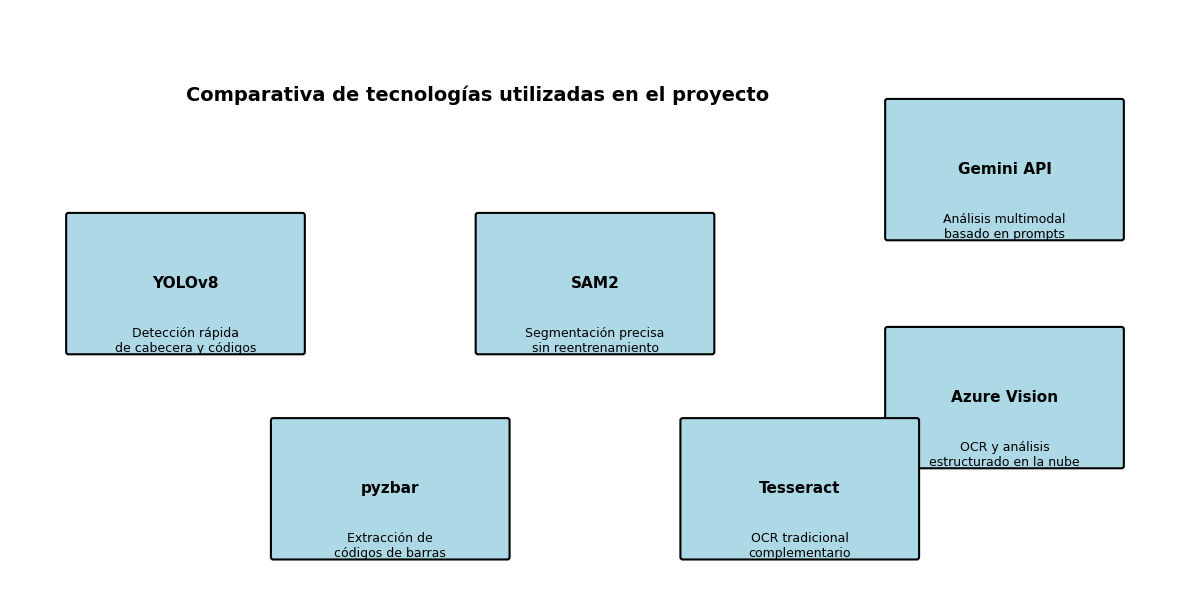

In [1]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches

# Crear figura y eje
fig, ax = plt.subplots(figsize=(12, 6))

# Añadir rectángulos para representar cada tecnología
techs = [
    {"name": "YOLOv8", "xy": (0.5, 2), "desc": "Detección rápida\nde cabecera y códigos"},
    {"name": "SAM2", "xy": (4, 2), "desc": "Segmentación precisa\nsin reentrenamiento"},
    {"name": "Gemini API", "xy": (7.5, 3), "desc": "Análisis multimodal\nbasado en prompts"},
    {"name": "Azure Vision", "xy": (7.5, 1), "desc": "OCR y análisis\nestructurado en la nube"},
    {"name": "pyzbar", "xy": (2.25, 0.2), "desc": "Extracción de\ncódigos de barras"},
    {"name": "Tesseract", "xy": (5.75, 0.2), "desc": "OCR tradicional\ncomplementario"}
]

# Dibujar cada tecnología como caja con descripción
for tech in techs:
    ax.add_patch(patches.FancyBboxPatch(
        tech["xy"], 2, 1.2,
        boxstyle="round,pad=0.02",
        linewidth=1.5,
        facecolor="lightblue"
    ))
    ax.text(tech["xy"][0]+1, tech["xy"][1]+0.6, tech["name"],
            ha="center", va="center", fontsize=11, fontweight='bold')
    ax.text(tech["xy"][0]+1, tech["xy"][1]+0.1, tech["desc"],
            ha="center", va="center", fontsize=9)

# Añadir etiquetas generales
ax.text(4, 4.2, "Comparativa de tecnologías utilizadas en el proyecto", ha="center", fontsize=14, fontweight='bold')

# Ajustes del gráfico
ax.set_xlim(0, 10)
ax.set_ylim(0, 5)
ax.axis("off")

plt.tight_layout()
plt.show()


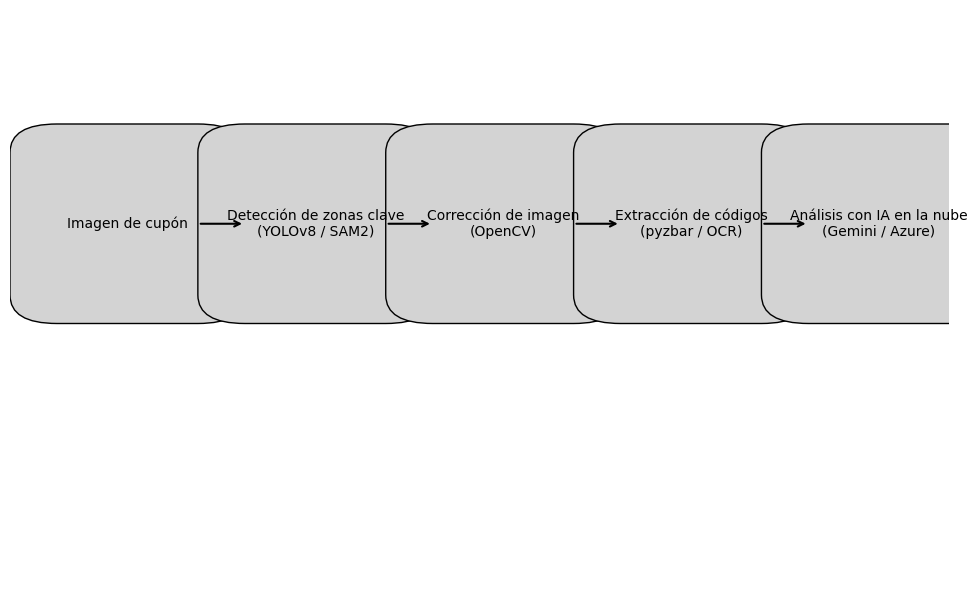

In [2]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches

fig, ax = plt.subplots(figsize=(10, 6))
ax.axis('off')

# Cajas principales del pipeline
components = [
    ("Imagen de cupón", (0.05, 0.5)),
    ("Detección de zonas clave\n(YOLOv8 / SAM2)", (0.25, 0.5)),
    ("Corrección de imagen\n(OpenCV)", (0.45, 0.5)),
    ("Extracción de códigos\n(pyzbar / OCR)", (0.65, 0.5)),
    ("Análisis con IA en la nube\n(Gemini / Azure)", (0.85, 0.5)),
]

# Dibujar las cajas y texto
for label, (x, y) in components:
    ax.add_patch(patches.FancyBboxPatch((x, y), 0.15, 0.25, boxstyle="round,pad=0.05", edgecolor='black', facecolor='lightgray'))
    ax.text(x + 0.075, y + 0.125, label, ha='center', va='center', fontsize=10)

# Flechas entre cajas
for i in range(len(components) - 1):
    x_start = components[i][1][0] + 0.15
    x_end = components[i + 1][1][0]
    ax.annotate("", xy=(x_end, 0.625), xytext=(x_start, 0.625),
                arrowprops=dict(arrowstyle="->", lw=1.5))

plt.tight_layout()
plt.show()
